In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Make numpy print 4 significant digits for prettiness
np.set_printoptions(precision=4, suppress=True)
np.random.seed(5) # To get predictable random numbers
%matplotlib inline

<BarContainer object of 40 artists>

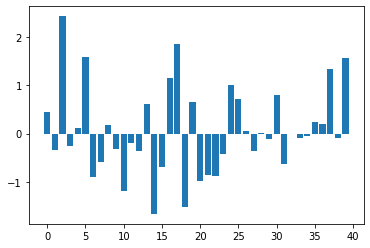

In [2]:
n_points = 40
x_vals = np.arange(n_points)
y_vals = np.random.normal(size=n_points)
plt.bar(x_vals, y_vals)

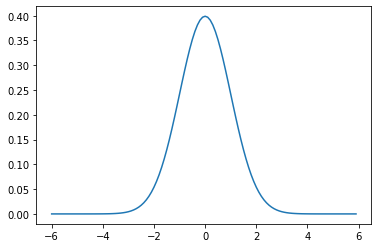

In [6]:
# The Gaussian kernel

x = np.arange(-6, 6, 0.1) # x from -6 to 6 in steps of 0.1
y = 1 / np.sqrt(2 * np.pi) * np.exp(-x ** 2 / 2)
plt.plot(x, y)

When the Gaussian is used for smoothing, it is common for imagers to describe the width of the Gaussian with another related measure, the Full Width at Half Maximum (FWHM), which is the width of the kernel, at half of the maximum of the height of the Gaussian. 

In [5]:
def sigma2fwhm(sigma):
    return sigma * np.sqrt(8 * np.log(2))

def fwhm2sigma(fwhm):
    return fwhm / np.sqrt(8 * np.log(2))

sigma2fwhm(1)

2.3548200450309493

<BarContainer object of 40 artists>

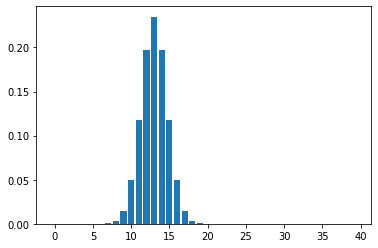

In [7]:
# Smoothing with the kernel

FWHM = 4
sigma = fwhm2sigma(FWHM)
x_position = 13 # smooth value for the 14th value in example data set
kernel_at_pos = np.exp(-(x_vals - x_position) ** 2 / (2 * sigma ** 2))
kernel_at_pos = kernel_at_pos / sum(kernel_at_pos)
# Gaussian kernel served as weight
plt.bar(x_vals, kernel_at_pos)

In [8]:
kernel_at_pos[11:16]

array([0.1174, 0.1975, 0.2349, 0.1975, 0.1174])

In [9]:
y_vals[11:16]

array([-0.2049, -0.3588,  0.6035, -1.6648, -0.7002])

In [10]:
y_by_weight = y_vals * kernel_at_pos # element-wise multiplication
new_val = sum(y_by_weight)
new_val

-0.3479685901184573

<BarContainer object of 40 artists>

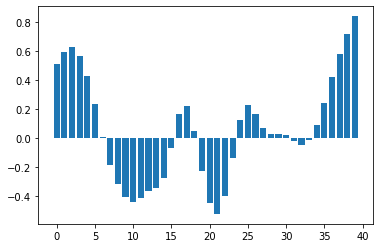

In [11]:
smoothed_vals = np.zeros(y_vals.shape)
for x_position in x_vals:
    kernel = np.exp(-(x_vals - x_position) ** 2 / (2 * sigma ** 2))
    kernel = kernel / sum(kernel)
    smoothed_vals[x_position] = sum(y_vals * kernel)
plt.bar(x_vals, smoothed_vals)

### Smoothing in 2D

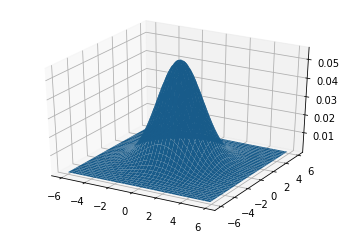

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dx = 0.1
dy = 0.1
x = np.arange(-6, 6, dx)
y = np.arange(-6, 6, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral
ax.plot_surface(x2d, y2d, kernel_2d)

<BarContainer object of 40 artists>

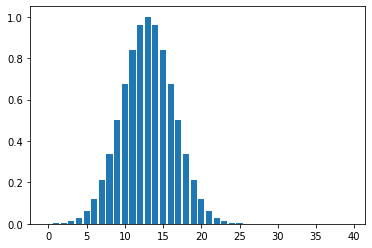

In [13]:
FWHM = 8
sigma = fwhm2sigma(FWHM)
x_position = 13 # 14th point
sim_signal = np.exp(-(x_vals - x_position) ** 2 / (2 * sigma ** 2))
plt.bar(x_vals, sim_signal)

<BarContainer object of 40 artists>

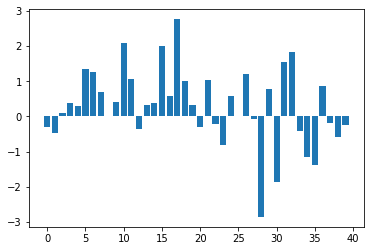

In [14]:
noise = np.random.normal(size=n_points)
sim_data = sim_signal + noise
plt.bar(x_vals, sim_data)

<BarContainer object of 40 artists>

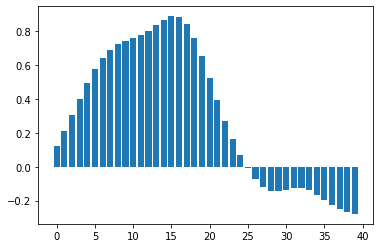

In [15]:
smoothed_sim_data = np.zeros(y_vals.shape)
for x_position in x_vals:
    kernel = np.exp(-(x_vals - x_position) ** 2 / (2 * sigma ** 2))
    kernel = kernel / sum(kernel)
    smoothed_sim_data[x_position] = sum(sim_data * kernel)
plt.bar(x_vals, smoothed_sim_data)

### Smoothing as convolution

In [16]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

<BarContainer object of 40 artists>

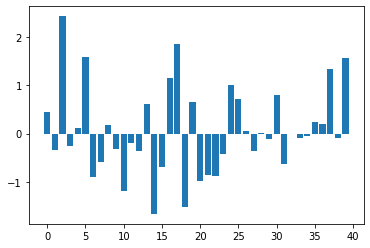

In [17]:
# Smoothing as weighted average

np.random.seed(5) # To get predictable random numbers
n_points = 40
x_vals = np.arange(n_points)
y_vals = np.random.normal(size=n_points)
plt.bar(x_vals, y_vals)

In [19]:
def fwhm2sigma(fwhm):
    return fwhm / np.sqrt(8 * np.log(2))
sigma = fwhm2sigma(4)
sigma

1.6986436005760381

<BarContainer object of 40 artists>

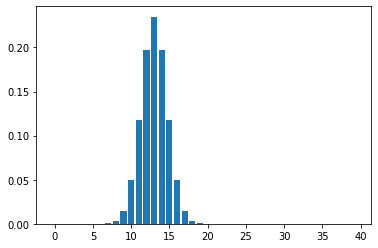

In [20]:
x_position = 13
# Make Gaussian centered at 13 with given sigma
kernel_at_pos = np.exp(-(x_vals - x_position) ** 2 / (2 * sigma ** 2))
# Make kernel sum to 1
kernel_at_pos = kernel_at_pos / sum(kernel_at_pos)
plt.bar(x_vals, kernel_at_pos)

The new smoothed value for x=13 is the sum of the data y values (yi:i∈0,1,..39) multiplied by their respective kernel y values (ki:i∈0,1,..39):

In [21]:
print(np.sum(y_vals * kernel_at_pos))

-0.3479685901184573


In [22]:
print(y_vals.dot(kernel_at_pos))

-0.34796859011845727


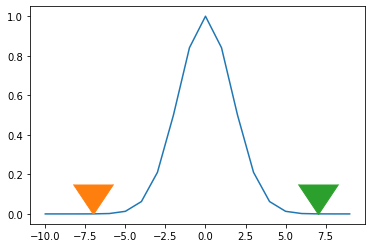

In [28]:
# Using a finite width for the kernel

# Make a +/- x range large enough to let kernel drop to zero
x_for_kernel = np.arange(-10, 10)
# Calculate kernel
kernel = np.exp(-(x_for_kernel) ** 2 / (2 * sigma ** 2))
# Threshold
kernel_above_thresh = kernel > 0.0001
# Find x values where kernel is above threshold
x_within_thresh = x_for_kernel[kernel_above_thresh]
plt.plot(x_for_kernel, kernel)
plt.plot(min(x_within_thresh), 0, marker=7, markersize=40)
plt.plot(max(x_within_thresh), 0, marker=7, markersize=40)

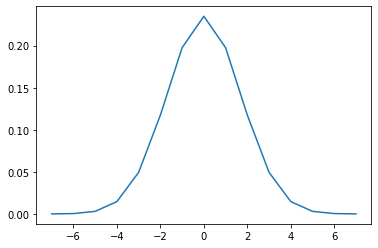

In [24]:
finite_kernel = kernel[kernel_above_thresh]
# Make kernel sum to 1 again
finite_kernel = finite_kernel / finite_kernel.sum()
plt.plot(x_within_thresh, finite_kernel)

In [25]:
len(finite_kernel)

15

In [26]:
# Number of kernel points before center (at 0)
kernel_n_below_0 = int((len(finite_kernel) - 1) / 2.)
kernel_n_below_0

7

In [27]:
# Multiply and sum y values within the finite kernel
kernel_starts_at = 13 - kernel_n_below_0
y_within_kernel = y_vals[kernel_starts_at : kernel_starts_at + len(finite_kernel)]
print(np.dot(finite_kernel, y_within_kernel))

-0.34797367299377524


In [29]:
# Smoothing as convolution

convolved_y = np.convolve(y_vals, finite_kernel)
print(convolved_y[13+ kernel_n_below_0])

-0.34797367299377524


<BarContainer object of 40 artists>

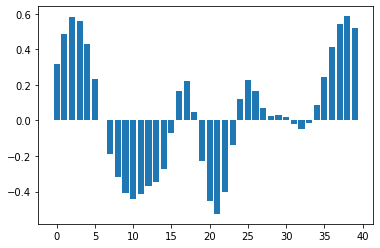

In [30]:
smoothed_by_convolving = convolved_y[kernel_n_below_0:(n_points+kernel_n_below_0)]
plt.bar(x_vals, smoothed_by_convolving)

<BarContainer object of 40 artists>

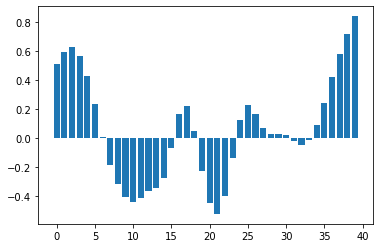

In [31]:
# Convolution and edges

smoothed_vals = np.zeros(y_vals.shape)
for x_position in x_vals:
     kernel = np.exp(-(x_vals - x_position) ** 2 / (2 * sigma ** 2))
     kernel = kernel / sum(kernel)
     smoothed_vals[x_position] = sum(y_vals * kernel)
plt.bar(x_vals, smoothed_vals)

At the left and right edges, this method is only applying half a Gaussian to the data. On the left it is applying the right half of the Gaussian, and on the right it is applying the left half of the Gaussian. This simple method always makes the kernel sum to zero, so, when smoothing the points at the edges, with the half kernel, the remaining points get more weight.